In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
lr =10
UNIT_G=1e9
MTU=1000
labels = {
    0: "(0,1KB]",
    1: "(1KB,10KB]",
    2: "(10KB,50KB]",
    3: "(50KB,inf)",
}

5
spec=shard0_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard1_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard2_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard3_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard4_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0


/tmp/ipykernel_3629817/641499325.py:55: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[0].stem(fid, sldns, linefmt=color, markerfmt=color + marker, basefmt=" ", label=label, use_line_collection=True)
/tmp/ipykernel_3629817/641499325.py:64: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[1].stem(fid, fats, linefmt=color, markerfmt=color + marker, basefmt=" ", label=label, use_line_collection=True)
/tmp/ipykernel_3629817/641499325.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels([x[0] for x in drop_counts], rota

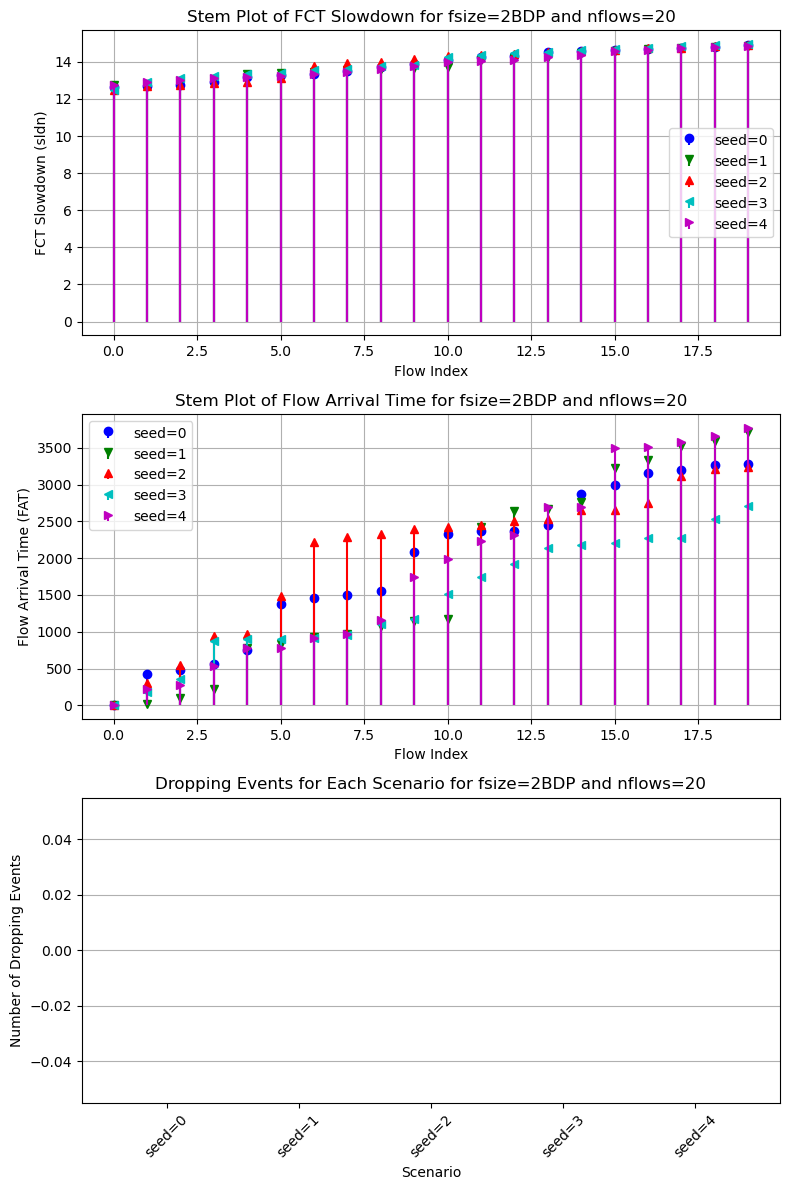

5
spec=shard0_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard1_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard2_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard3_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard4_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0


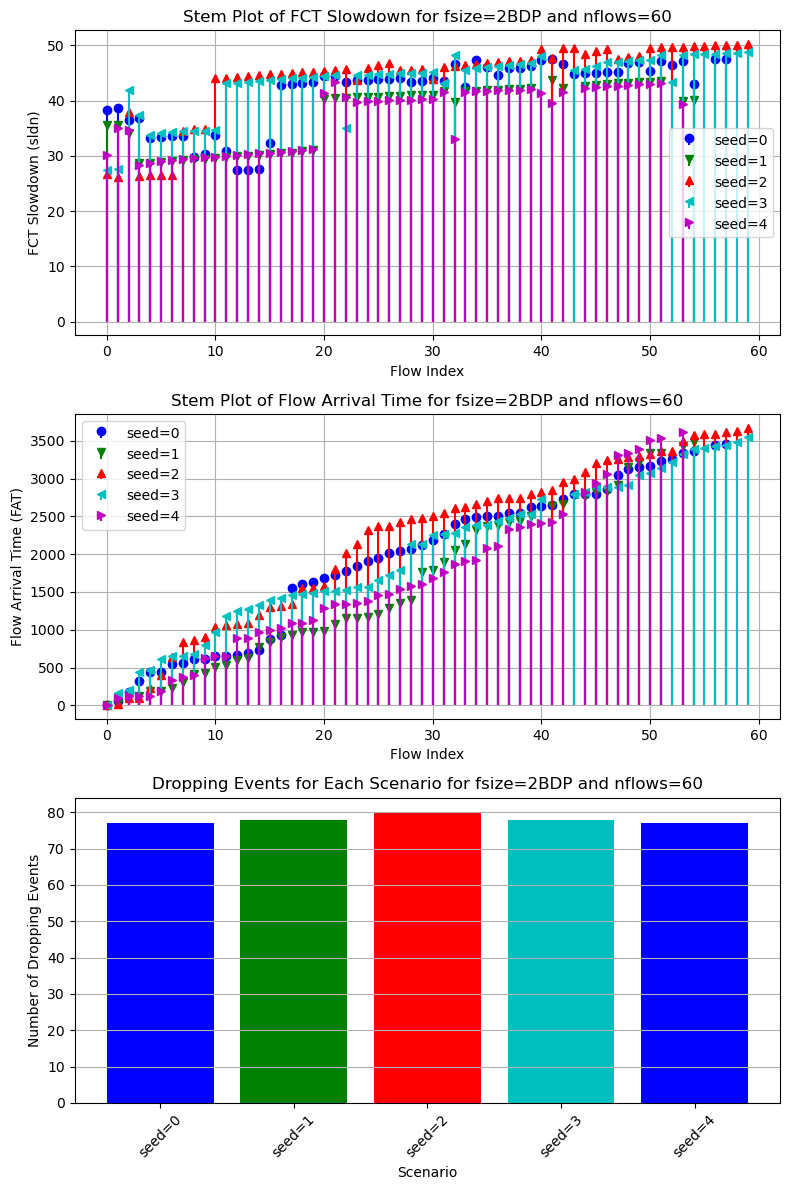

5
spec=shard0_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard1_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard2_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard3_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard4_nflows1_nhosts21_lr10Gbps,_topo-pl-21_s0_i0


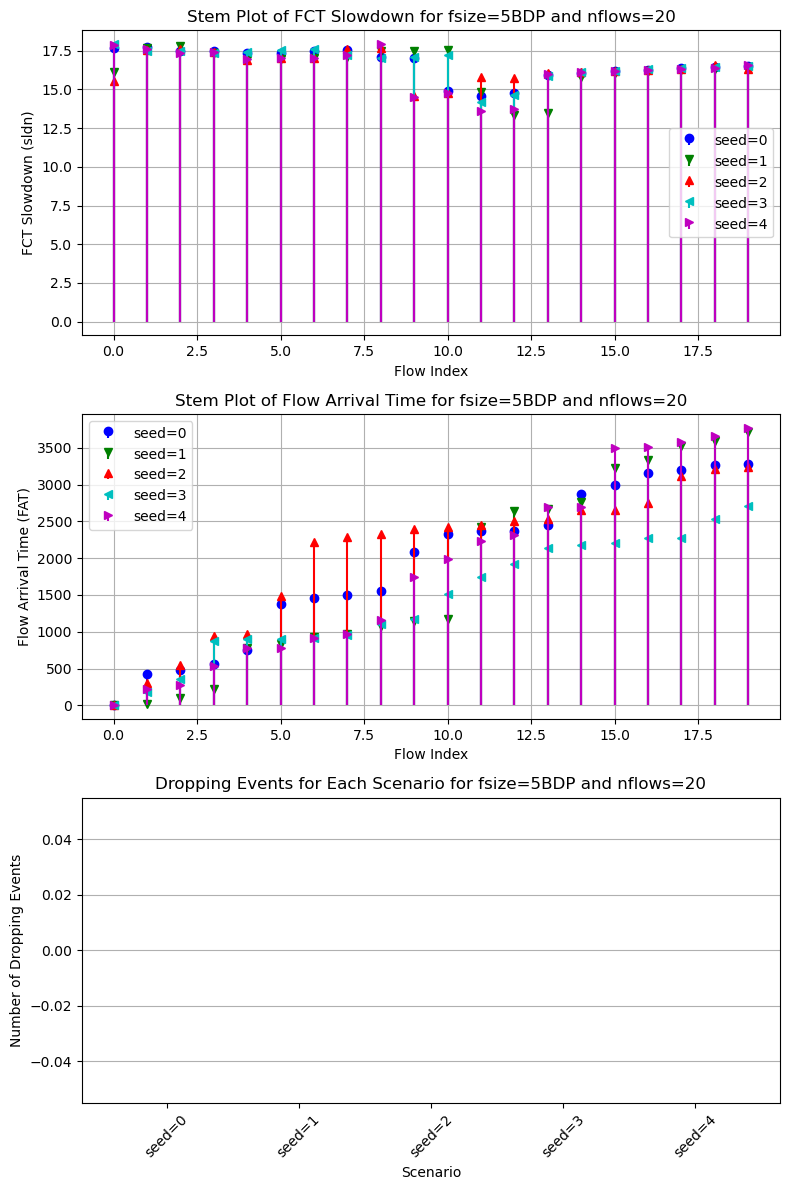

5
spec=shard0_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard1_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard2_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard3_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0
spec=shard4_nflows3_nhosts21_lr10Gbps,_topo-pl-21_s0_i0


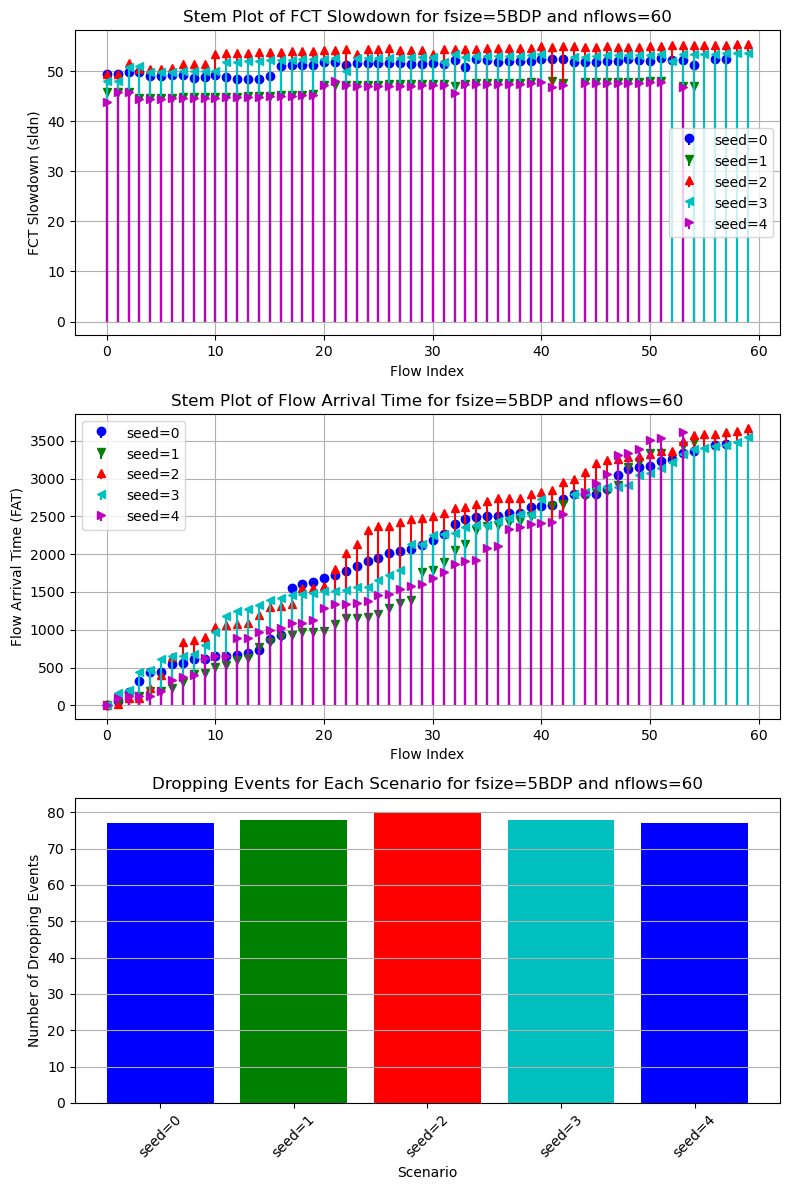

In [40]:
# STEM PLOT FOR THE FCT slowdown
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'x', 'D']

for fsize_idx in [2,5]:
    dir_input=f"/data2/lichenni/path_perflow_chaotic_s{fsize_idx}"
    for n_flows in [1,3]:
        dir_input_str=""
        topo_type="_topo-pl-x_"
        data_list=[]
        for shard in np.arange(5):
            for n_hosts in [21]:
                for sample in [0]:
                    topo_type_cur=topo_type.replace("-x_",f"-{n_hosts}_")+"s%d_i0"%(sample)
                    spec=f"shard{shard}_nflows{n_flows}_nhosts{n_hosts}_lr{lr}Gbps{dir_input_str}"
                    fid = np.load(f"{dir_input}/{spec}/fid{topo_type_cur}.npy")
                    if len(fid)==len(set(fid)) and np.all(fid[:-1] <= fid[1:]):
                        data_list.append((spec,(0,n_hosts-1),topo_type_cur))
                
        print(len(data_list))
        
        all_sldns = []
        all_fats = []
        all_fat_indexes = []
        drop_counts=[]
        for spec_idx,(spec,src_dst_pair_target,topo_type) in enumerate(data_list):
            print(f"spec={spec},{topo_type}")
            dir_input_tmp = f"{dir_input}/{spec}"
            
            fid=np.load(f"{dir_input_tmp}/fid{topo_type}.npy")
            
            fats_flowsim = np.load(f"{dir_input_tmp}/fat.npy")
            fats=fats_flowsim[fid]
            
            fcts = np.load(f'{dir_input_tmp}/fct{topo_type}.npy')
            i_fcts = np.load(f'{dir_input_tmp}/fct_i{topo_type}.npy')
            sldns = np.divide(fcts, i_fcts)

            all_sldns.append((fid, sldns, colors[spec_idx % len(colors)], markers[spec_idx % len(markers)], f'seed={spec_idx}'))
            all_fats.append((fid, fats-UNIT_G, colors[spec_idx % len(colors)], markers[spec_idx % len(markers)], f'seed={spec_idx}'))
            
            pdrop_log=f'{dir_input_tmp}/pdrop{topo_type}.txt'
            # Read pdrop log and count dropping events
            pdrop_log = f'{dir_input_tmp}/pdrop{topo_type}.txt'
            with open(pdrop_log, 'r') as file:
                log_lines = file.readlines()
            drop_count = sum(1 for line in log_lines if "dropping lossless packet" in line)
            drop_counts.append([f'seed={spec_idx}',drop_count])
            
        # Create a single figure with subplots
        fig, axs = plt.subplots(3, 1, figsize=(8, 12))

        # Plot FCT slowdown stem plot
        for fid, sldns, color, marker, label in all_sldns:
            axs[0].stem(fid, sldns, linefmt=color, markerfmt=color + marker, basefmt=" ", label=label, use_line_collection=True)
        axs[0].set_xlabel('Flow Index')
        axs[0].set_ylabel('FCT Slowdown (sldn)')
        axs[0].set_title(f'Stem Plot of FCT Slowdown for fsize={fsize_idx}BDP and nflows={n_flows*20}')
        axs[0].legend()
        axs[0].grid()

        # Plot FAT stem plot
        for fid, fats, color, marker, label in all_fats:
            axs[1].stem(fid, fats, linefmt=color, markerfmt=color + marker, basefmt=" ", label=label, use_line_collection=True)
        axs[1].set_xlabel('Flow Index')
        axs[1].set_ylabel('Flow Arrival Time (FAT)')
        axs[1].set_title(f'Stem Plot of Flow Arrival Time for fsize={fsize_idx}BDP and nflows={n_flows*20}')
        axs[1].legend()
        axs[1].grid()

        # Plot dropping events
        axs[2].bar([x[0] for x in drop_counts], [x[1] for x in drop_counts], color=colors[:len(labels)])
        axs[2].set_xlabel('Scenario')
        axs[2].set_ylabel('Number of Dropping Events')
        axs[2].set_title(f'Dropping Events for Each Scenario for fsize={fsize_idx}BDP and nflows={n_flows*20}')
        axs[2].set_xticklabels([x[0] for x in drop_counts], rotation=45)
        axs[2].grid(axis='y')

        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()